<img
     img align="left"
     src="src/uni_logo_white.png"
     alt="Universität Bielefeld"
     width="20%"
/>

# Miniproject 10: Meta-Learning with Reptile
#### József Lurvig
*19. July 2022*

## Abstract

*A. Nichol, J. Achiam, J. Schulman (2018): On First-Order Meta-Learning Algorithms*

This paper considers meta-learning problems, where there is a distribution of tasks, and we would like to obtain an agent that performs well (i.e., learns quickly) when presented with a previously unseen task sampled from this distribution.

Problem: Many tasks: for every task a different AI needs to be trained and training takes long.

## Content
- First order MAML
- Reptile

### Human vs Machine Learning
ML systems have surpassed humans at many tasks, but they need far more data to reach the same level of performance. This comparison is however not fair, because these algorithms have to start from scratch, humans enter the task with a large amount of prior/background knowledge, encoded in their brains and DNA. Humans don't learn every time from scratch, but they are fine-tuning and recombining a set of pre-existing skills.

Tenenbaum et al.: This can be explained as Bayesian inference --> the key is to make our algorithms more Bayesian. This is however difficult. (should make use of deep neural networks and should be computationally feasible)

## Meta-learning

- seeks to directly optimize a fast-learning algorithm
- we have a distribution over tasks $\to$ a training set and a test set

## Model-agnostic meta-learning (MAML)

Model-Agnostic Meta-Learning (MAML) was introduced in 2017 by Chelsea Finn et al. Given a sequence of tasks, the parameters of a given model are trained such that few iterations of gradient descent with few training data from a new task will lead to good generalization performance on that task. MAML "trains the model to be easy to fine-tune." MAML was successfully applied to few-shot image classification benchmarks and to policy-gradient-based reinforcement learning. **[[3](https://en.wikipedia.org/wiki/Meta_learning_(computer_science))]**

Compatible with any model trained with gradient descent and applicable to a variety of different learning problems. The goal of meta-learning is to train a model on a variety of learning tasks, such that it can solve new learning tasks using only a small number of training samples. **[[4](https://arxiv.org/abs/1703.03400)]**

1. MAML is a powerful tool for meta-learning that can be used to improve the performance of machine learning models.
2. MAML can be used to train models on a variety of tasks and then fine-tune them for a specific task.
3. MAML is efficient and can be used to train models on large datasets.
4. MAML is scalable and can be used to train models on a variety of hardware platforms.
5. MAML is open source and available for use by anyone.

## Test description

Access a distribution over tasks, they sample a training set of tasks and a test set of tasks.

Algorithm gets trainig set of tasks and produces agent, that has good average performance on the test set of tasks. Reenforcement reward = learning quickly.

## Reptile

- a new first-order gradient-based meta-learning algorithm

#### Reptile algorithm *(serial version)*
> *Initialize $\phi$*                    *initial parameter vector*\
> **for** *i* **do**
> > *Sample $\tau$*                 *$\tau$ : task, $L_{\tau}$ : loss, $\tilde{\phi}$ weight vectors*\
> > *Compute $\tilde{\phi}$*              *$\tilde{\phi} = U_{\tau}^{k}(\phi)$, denoting $k$ steps of SGD or Adam*\
> > *Update $\phi$*                 *$\phi \leftarrow \phi + \epsilon (\tilde{\phi} - \phi)$*
> >
> **end**\
> *Return $\phi$* 

#### Reptile algorithm *(batched version)*
> *Initialize $\phi$*                                                      *vector of initial parameters of the model*\
> *Sample $\tau_{1}, \tau_{2}, \dots, \tau_{n}$*                                 *subset of tasks*\
> **for** $i \leftarrow 1$ **to** $n_{epochs}$ **do**
> > **for** $j \leftarrow 1$ **to** $batch\_size$ **do**
> > > *$W \leftarrow SGD(L_{\tau_{i}}, \phi, k)$*                    *$k$ : number of SGD steps*
> > >
> > **end**\
> > *Update $\phi$*                                                  *$\phi \leftarrow \phi + \frac{\epsilon}{k}\sum_{i=1}^n (W_i - \phi)$*
> >
> **end**\
> *Return $\phi$*

### Case Study: One-Dimensional Sine Wave Regression

- let's look at: task = 1D sine regression

1. $f(x) = a\cdot{\sin(x+b)}$, where amplitude $a \sim U([0.1, 5])$ and phase $b \sim U([0, 2\pi])$
1. Sample $x_{1}, x_{2}, \dots, x_{p}$
1. Learner sees $(x_{1}, y_{1}), (x_{2}, y_{2}), \dots, (x_{p}, y_{p})$ and predicts $f(x)$
1. Loss is $L_{\tau}(f) = \int_{-5}^{5}dx||f(x)-f_{\tau}(x)||^{2}$

Note that $\mathbb{E}_{\tau}[f_{\tau}()x]=0$ due to the random phase $b$

### Demonstration of MAML and Reptile on a "toy" problem

- few-shot regression
- training on 10 sampled points of random sine wave
- 32 gradient steps
- MLP with layers $1 \to 64 \to 64 \to 1$

| <img src="src/sine_maml.png" width="320"/> | <img src="src/sine_reptile.png" width="320"/> |
| :----: | :----: |
| After MAML training | After Reptile training |

In [ ]:
from torch import nn

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1),
)

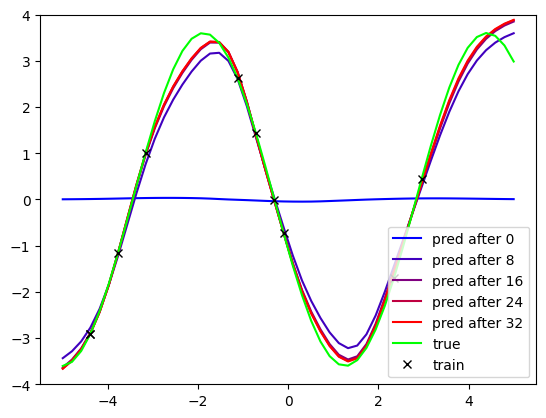

-----------------------------
iteration               30000
loss on plotted curve   0.048


In [1]:
# %run /home/parallels/supervised-reptile/supervised_reptile/reptile-sinewaves-demo.py
%run reptile-sinewaves-demo.py

### Analysis

- two alternative explanations of why Reptile works

#### 1. Leading Order Expansion of the Update

- Taylor series expansion to approximate the update performed by
  - Reptile and
  - MAML
Result:
- both contain the same leading-order terms
  - 1st term: minimizes expected loss *(joint training)*
  - 2nd term: maximizes within-task generalization

#### 2. Finding a Point Near All Solution Manifolds

In [1]:
NOTE: #NÉZD MEG EZT A VIDEÓT!!!

SyntaxError: invalid syntax (<ipython-input-1-941c3e69247b>, line 1)

https://youtu.be/raHM3k-uR0E?t=358

## Resources

**[1] A. Nichol, J. Achiam, J. Schulman (2018):** *On First-Order Meta-Learning Algorithms*\
**[2] A. Nichol and J. Schulman (2018):** *Reptile: a Scalable Meta-Learning Algorithm*\
**[3] Wikipedia (accessed July 2022):** *Meta learning (computer science) https://en.wikipedia.org/wiki/Meta_learning_(computer_science)*\
**[4] C. Finn, P. Abbeel, S. Levine (2017):** *Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks*